### **Q6: Are there any significant differences in the academic performance of student-athletes based on their sport?**


Top 3 Teams by Average GPA:
------------------------------------------------------------
                         Count  Mean GPA  Std Dev
Student Athletic Team 1                          
Kickball                     8     3.732    0.220
Beach Volleyball            10     3.665    0.280
Ping Pong                   30     3.612    0.343

Bottom 3 Teams by Average GPA:
------------------------------------------------------------
                         Count  Mean GPA  Std Dev
Student Athletic Team 1                          
Roller Derby                29     3.177    0.272
Badminton                   58     3.025    0.298
Volleyball                  17     3.009    0.512

Complete Team Rankings by GPA:
------------------------------------------------------------
                         Rank  Count  Mean GPA  Std Dev
Student Athletic Team 1                                
Kickball                    1      8     3.732    0.220
Beach Volleyball            2     10     3.665    0.280


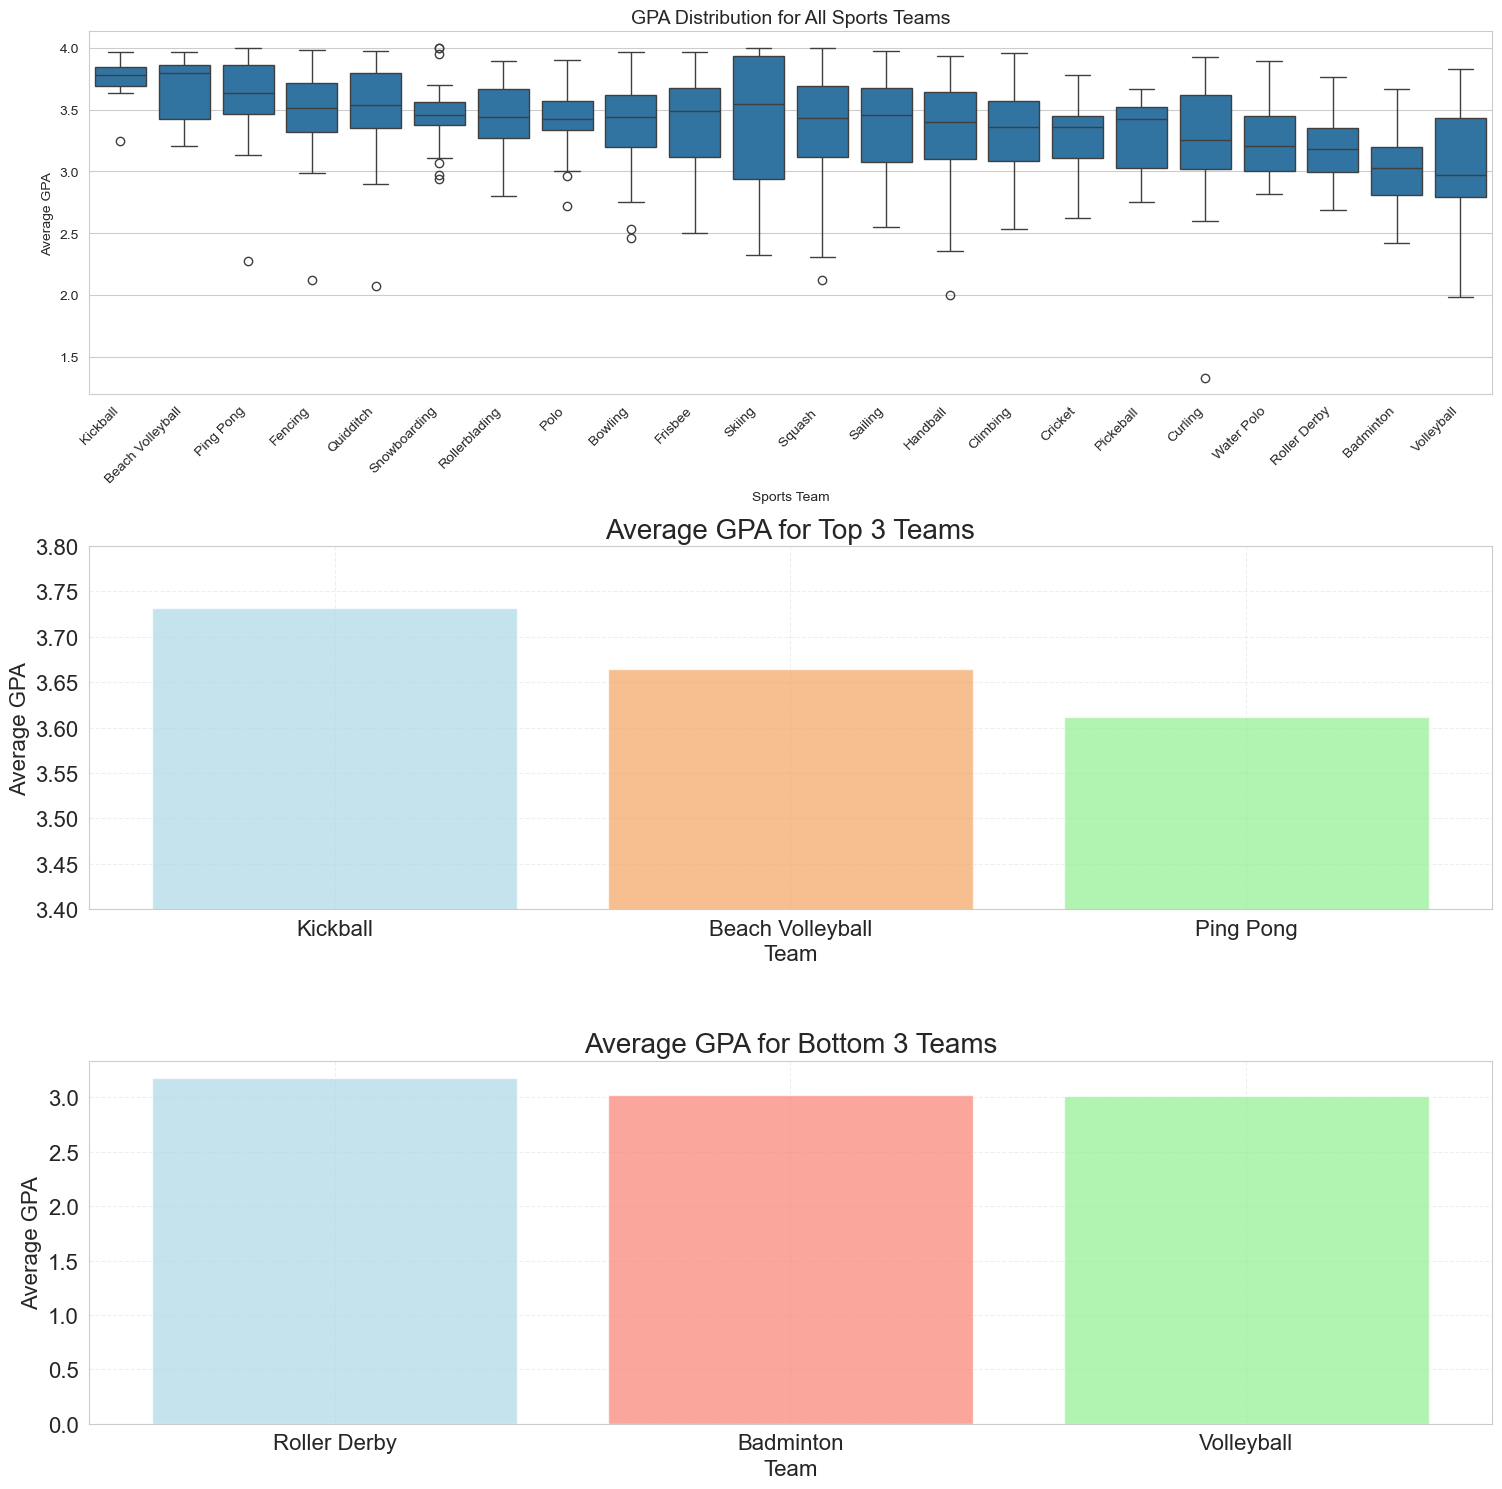

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway

def analyze_sports_performance(file_path):
    # Read the data
    data = pd.read_csv(file_path)

    # Extract GPA columns
    gpi_columns = [col for col in data.columns if 'GPI' in col]
    gpi_data = data[gpi_columns]

    # Calculate the average GPA for each student
    data['Average GPA'] = gpi_data.mean(axis=1, skipna=True)

    # Remove rows where Average GPA is 0 or NaN
    data = data[(data['Average GPA'] != 0) & (data['Average GPA'].notna())]

    # Group by sports teams and calculate statistics
    team_stats = data.groupby('Student Athletic Team 1').agg({
        'Average GPA': ['count', 'mean', 'std']
    }).round(3)
    team_stats.columns = ['Count', 'Mean GPA', 'Std Dev']

    # Sort by mean GPA
    team_stats_sorted = team_stats.sort_values(by='Mean GPA', ascending=False)

    # Get top 3 and bottom 3 teams
    top_3_teams = team_stats_sorted.head(3)
    bottom_3_teams = team_stats_sorted.tail(3)

    # Create a ranked table with team statistics
    team_stats_sorted_with_rank = team_stats_sorted.copy()
    team_stats_sorted_with_rank.insert(0, 'Rank', range(1, len(team_stats_sorted_with_rank) + 1))

    # Create visualizations
    plt.figure(figsize=(15, 15))

    # 1. Box plot for all sports teams
    plt.subplot(3, 1, 1)
    sorted_teams = team_stats_sorted.index
    sns.boxplot(x='Student Athletic Team 1', y='Average GPA', data=data,
                order=sorted_teams)
    plt.title('GPA Distribution for All Sports Teams', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Sports Team')
    plt.ylabel('Average GPA')

    # 2. Bar chart for top 3 teams
    plt.subplot(3, 1, 2)
    teams = top_3_teams.index
    means = top_3_teams['Mean GPA']
    plt.bar(teams, means, color=['lightblue', 'sandybrown', 'lightgreen'], alpha=0.7)
    plt.title('Average GPA for Top 3 Teams', fontsize=20)
    plt.xlabel('Team', fontsize=16)
    plt.ylabel('Average GPA', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tick_params(axis='both', labelsize=16)
    plt.ylim(3.4, 3.8)  # Adjust the y-axis range for better visualization

    # 3. Bar chart for bottom 3 teams
    plt.subplot(3, 1, 3)
    teams = bottom_3_teams.index
    means = bottom_3_teams['Mean GPA']
    plt.bar(teams, means, color=['lightblue', 'salmon', 'lightgreen'], alpha=0.7)
    plt.title('Average GPA for Bottom 3 Teams', fontsize=20)
    plt.xlabel('Team', fontsize=16)
    plt.ylabel('Average GPA', fontsize=16)
    plt.tick_params(axis='both', labelsize=16)
    plt.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()

    # Print basic results
    print("\nTop 3 Teams by Average GPA:")
    print("-" * 60)
    print(top_3_teams)

    print("\nBottom 3 Teams by Average GPA:")
    print("-" * 60)
    print(bottom_3_teams)

    print("\nComplete Team Rankings by GPA:")
    print("-" * 60)
    print(team_stats_sorted_with_rank)

    # Calculate the IQR for each team
    team_iqr = data.groupby('Student Athletic Team 1')['Average GPA'].agg(
        lambda x: np.percentile(x, 75) - np.percentile(x, 25)
    ).round(3)

    # Sort teams by consistency (IQR)
    most_consistent = team_iqr.sort_values().head(3)
    least_consistent = team_iqr.sort_values(ascending=False).head(3)

    print("\nKey Insights and Observations:")
    print("-" * 60)

    # Print consistency analysis
    print("\nTeam Consistency Analysis (based on IQR):")
    print("\nMost Consistent Teams (smallest IQR):")
    for team, iqr in most_consistent.items():
        mean_gpa = team_stats_sorted.loc[team, 'Mean GPA']
        print(f"• {team}: IQR = {iqr:.3f}, Mean GPA = {mean_gpa:.3f}")

    print("\nLeast Consistent Teams (largest IQR):")
    for team, iqr in least_consistent.items():
        mean_gpa = team_stats_sorted.loc[team, 'Mean GPA']
        print(f"• {team}: IQR = {iqr:.3f}, Mean GPA = {mean_gpa:.3f}")

    # Analyze performance patterns
    print("\nPerformance Patterns:")
    print("\nTop Performing Teams:")
    for team in top_3_teams.index:
        team_data = data[data['Student Athletic Team 1'] == team]['Average GPA']
        print(f"• {team}:")
        print(f" - Mean GPA: {team_data.mean():.3f}")
        print(f" - 75% of students above: {np.percentile(team_data, 25):.3f}")
        print(f" - Students: {len(team_data)}")

    print("\nTeams Needing Improvement:")
    for team in bottom_3_teams.index:
        team_data = data[data['Student Athletic Team 1'] == team]['Average GPA']
        print(f"• {team}:")
        print(f" - Mean GPA: {team_data.mean():.3f}")
        print(f" - 75% of students below: {np.percentile(team_data, 75):.3f}")
        print(f" - Students: {len(team_data)}")

    # Calculate p-value for the difference in GPA between sports teams
    teams = data['Student Athletic Team 1'].unique()
    team_gpas = [data[data['Student Athletic Team 1'] == team]['Average GPA'] for team in teams]
    f_stat, p_value = f_oneway(*team_gpas)
    print("\nP-value for GPA differences between sports teams:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.20f}")

    return {
        'team_stats_sorted': team_stats_sorted_with_rank,
        'top_3_teams': top_3_teams,
        'bottom_3_teams': bottom_3_teams,
        'visualization': plt.gcf(),
        'consistency_analysis': {
            'most_consistent': most_consistent,
            'least_consistent': least_consistent
        },
        'p_value_analysis': {
            'f_stat': f_stat,
            'p_value': p_value
        }
    }


# Run the analysis
file_path = r'C:\Users\chenk\OneDrive\桌面\BU Study\DS701\Q6\cleaned_data.csv'
results = analyze_sports_performance(file_path)
plt.show()